# EDA of the stock performance of Oil industry vs Tech sector. We are selecting Suncor, CNRL & Cenovus to represent Oil industry and Microsoft, AMD, Facebook for the Tech sector.

In [1]:
import warnings
warnings.simplefilter("ignore")

# Essential imports for data analysis for visualization 
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

#import if you want to read the data directly form the API using pandas_datareader
import pandas_datareader.data as web

# Imports for offline interactive plotting
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 
import cufflinks as cf
cf.go_offline()

# Setting style and inline plotting
sns.set_style('whitegrid')
%matplotlib inline

> Using pandas data reader, we will import last 5 year stock data

In [2]:
start = datetime.datetime(2016, 6, 1)
end = datetime.datetime(2021, 6, 30)
MICROSOFT = web.DataReader("MSFT", 'yahoo', start, end)
AMD = web.DataReader("AMD", 'yahoo', start, end)
FACEBOOK = web.DataReader("FB", 'yahoo', start, end)
SUNCOR = web.DataReader("SU", 'yahoo', start, end)
CNRL = web.DataReader("CNQ", 'yahoo', start, end)
CENOVUS = web.DataReader("CVE", 'yahoo', start, end)

In [3]:
CNRL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-06-01,29.260000,28.690001,29.129999,29.030001,3712600.0,23.346869
2016-06-02,29.420000,28.510000,28.610001,29.420000,2997900.0,23.660522
2016-06-03,29.940001,29.250000,29.670000,29.490000,2136200.0,23.716814
2016-06-06,30.010000,29.600000,29.920000,29.940001,1959800.0,24.078720
2016-06-07,31.340000,30.139999,30.230000,31.330000,2618000.0,25.196602


# Deleting the unimportant column for our analysis

In [4]:
del SUNCOR['Adj Close']
del CNRL['Adj Close']
del CENOVUS['Adj Close']
del AMD['Adj Close']
del FACEBOOK['Adj Close']
del MICROSOFT['Adj Close']

In [5]:
CNRL.head()

,High,Low,Open,Close,Volume
Date,,,,,
2016-06-01,29.260000,28.690001,29.129999,29.030001,3712600.0
2016-06-02,29.420000,28.510000,28.610001,29.420000,2997900.0
2016-06-03,29.940001,29.250000,29.670000,29.490000,2136200.0
2016-06-06,30.010000,29.600000,29.920000,29.940001,1959800.0
2016-06-07,31.340000,30.139999,30.230000,31.330000,2618000.0


In [6]:
tickers = ['SUNCOR', 'CENOVUS', 'CNRL', 'MICROSOFT', 'FACEBOOK','AMD']

# Concatenating the data

In [7]:
to = pd.concat([SUNCOR, CENOVUS, CNRL, MICROSOFT, FACEBOOK,AMD],axis=1, keys=tickers)

In [8]:
to.head()

SUNCOR                                                CENOVUS  \
                 High        Low       Open      Close     Volume       High   
Date                                                                           
2016-06-01  27.240000  26.639999  27.200001  27.070000  5149900.0  15.250000   
2016-06-02  27.440001  26.690001  26.730000  27.430000  3989500.0  15.280000   
2016-06-03  27.879999  27.340000  27.639999  27.520000  4176500.0  15.590000   
2016-06-06  28.030001  27.559999  27.850000  27.940001  3683900.0  15.600000   
2016-06-07  28.570000  28.080000  28.190001  28.530001  3211600.0  16.360001   

                                            ...    FACEBOOK              \
              Low   Open  Close     Volume  ...        High         Low   
Date                                        ...                           
2016-06-01  14.78  14.93  15.24  1410300.0  ...  119.080002  117.820000   
2016-06-02  14.88  15.01  15.22  1628700.0  ...  119.440002  118.220001   
2016-06-03  15.18  15.37  15.27  1520400.0  ...  118.980003  117.860001   
2016-06-06  15.34  15.43  15.50  1687400.0  ...  119.430000  118.360001   
2016-06-07  15.64  15.69  16.32  2185800.0  ...  119.300003  117.669998   

                                               AMD                              
                  Open       Close    Volume  High   Low  Open Close    Volume  
Date                                                                            
2016-06-01  118.500000  118.779999  15029500  4.64  4.38  4.60  4.43  29696400  
2016-06-02  118.690002  118.930000  13228300  4.40  4.07  4.37  4.24  35335000  
2016-06-03  118.980003  118.470001  14135100  4.20  4.08  4.16  4.16  17561800  
2016-06-06  118.620003  118.790001  12744700  4.51  4.17  4.20  4.47  21329600  
2016-06-07  119.239998  117.760002  17103000  4.67  4.47  4.56  4.51  20676200  

[5 rows x 30 columns]

In [9]:
to.columns.names

FrozenList([None, None])

In [10]:
to.columns.names = ['Entity','Stock']
to.columns.names 

FrozenList(['Entity', 'Stock'])

In [11]:
to.head()

Entity         SUNCOR                                                CENOVUS  \
Stock            High        Low       Open      Close     Volume       High   
Date                                                                           
2016-06-01  27.240000  26.639999  27.200001  27.070000  5149900.0  15.250000   
2016-06-02  27.440001  26.690001  26.730000  27.430000  3989500.0  15.280000   
2016-06-03  27.879999  27.340000  27.639999  27.520000  4176500.0  15.590000   
2016-06-06  28.030001  27.559999  27.850000  27.940001  3683900.0  15.600000   
2016-06-07  28.570000  28.080000  28.190001  28.530001  3211600.0  16.360001   

Entity                                      ...    FACEBOOK              \
Stock         Low   Open  Close     Volume  ...        High         Low   
Date                                        ...                           
2016-06-01  14.78  14.93  15.24  1410300.0  ...  119.080002  117.820000   
2016-06-02  14.88  15.01  15.22  1628700.0  ...  119.440002  118.220001   
2016-06-03  15.18  15.37  15.27  1520400.0  ...  118.980003  117.860001   
2016-06-06  15.34  15.43  15.50  1687400.0  ...  119.430000  118.360001   
2016-06-07  15.64  15.69  16.32  2185800.0  ...  119.300003  117.669998   

Entity                                         AMD                              
Stock             Open       Close    Volume  High   Low  Open Close    Volume  
Date                                                                            
2016-06-01  118.500000  118.779999  15029500  4.64  4.38  4.60  4.43  29696400  
2016-06-02  118.690002  118.930000  13228300  4.40  4.07  4.37  4.24  35335000  
2016-06-03  118.980003  118.470001  14135100  4.20  4.08  4.16  4.16  17561800  
2016-06-06  118.620003  118.790001  12744700  4.51  4.17  4.20  4.47  21329600  
2016-06-07  119.239998  117.760002  17103000  4.67  4.47  4.56  4.51  20676200  

[5 rows x 30 columns]

In [12]:
# Max close price
max_stock = to.xs(key='Close',axis=1,level='Stock').max()
max_stock

Entity
SUNCOR        42.270000
CENOVUS       16.320000
CNRL          37.950001
MICROSOFT    271.399994
FACEBOOK     355.640015
AMD           97.250000
dtype: float64

In [13]:
# Min close price
min_stock = to.xs(key='Close',axis=1,level='Stock').min()
min_stock

Entity
SUNCOR        10.450000
CENOVUS        1.600000
CNRL           7.740000
MICROSOFT     48.430000
FACEBOOK     108.970001
AMD            4.160000
dtype: float64

# Barplots for the max & min values over these 5 years

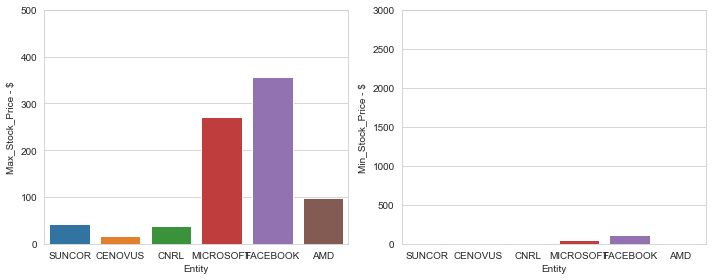

In [19]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
sns.barplot(max_stock.index, max_stock.values, ax=axes[0])
axes[0].set_ylim(0,500)
axes[0].set_ylabel('Max_Stock_Price - $')

sns.barplot(min_stock.index, min_stock.values, ax=axes[1])
axes[1].set_ylim(0,3000)
axes[1].set_ylabel('Min_Stock_Price - $')
plt.tight_layout()

# Line charts to get a better understanding of performance over time

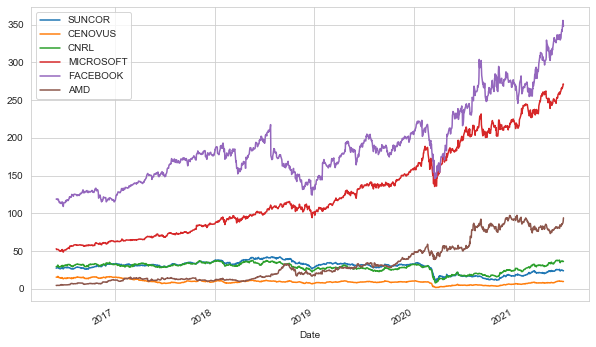

In [22]:
# for loop
for tick in tickers:
    to[tick]['Close'].plot(figsize=(10,6),label=tick)
plt.legend()

# Interactive plot will be nicer!

In [23]:
to.xs(key='Close',axis=1,level='Stock').iplot()

# Including WTI & USO in analysis 

In [26]:
import quandl

In [32]:
wti = quandl.get("EIA/PET_RWTC_D", start_date="2016-6-1", end_date="2021-6-30")

In [33]:
wti.head()

,Value
Date,
2016-06-01,49.07
2016-06-02,49.14
2016-06-03,48.69
2016-06-06,49.71
2016-06-07,50.37


In [ ]:
uso = web.DataReader('USO', 'yahoo', start, end) # ** United States Oil Fund LP (ETF)

In [34]:
uso.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-06-01,95.440002,92.480003,92.959999,95.440002,3194138.0,95.440002
2016-06-02,95.680000,93.199997,93.360001,94.879997,2800263.0,94.879997
2016-06-03,95.120003,93.599998,95.120003,94.559998,2396238.0,94.559998
2016-06-06,96.639999,95.199997,96.080002,96.320000,2926275.0,96.320000
2016-06-07,97.919998,96.559998,96.800003,97.760002,2280963.0,97.760002


In [35]:
del uso['Adj Close']

In [36]:
wti.columns = ['Oil Price / Barrel']
wti.head()

,Oil Price / Barrel
Date,
2016-06-01,49.07
2016-06-02,49.14
2016-06-03,48.69
2016-06-06,49.71
2016-06-07,50.37


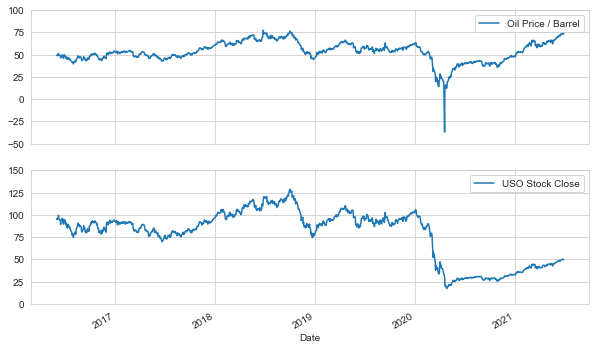

In [40]:
fig, axes = plt.subplots(nrows=2, figsize=(10, 6), sharex=True)
wti[::-1].plot(ax=axes[0],ylim=(-50,100))
uso['Close'].plot(ax=axes[1],ylim=(0,150), label = 'USO Stock Close')
plt.legend()

In [41]:
returns = pd.DataFrame()
for tick in tickers:
    returns[tick+' Return'] = to[tick]['Close'].pct_change()
returns.head()

,SUNCOR Return,CENOVUS Return,CNRL Return,MICROSOFT Return,FACEBOOK Return,AMD Return
Date,,,,,,
2016-06-01,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-02,0.013299,-0.001312,0.013434,-0.007001,0.001263,-0.042889
2016-06-03,0.003281,0.003285,0.002379,-0.013148,-0.003868,-0.018868
2016-06-06,0.015262,0.015062,0.015259,0.006565,0.002701,0.074519
2016-06-07,0.021117,0.052903,0.046426,-0.000576,-0.008671,0.008949


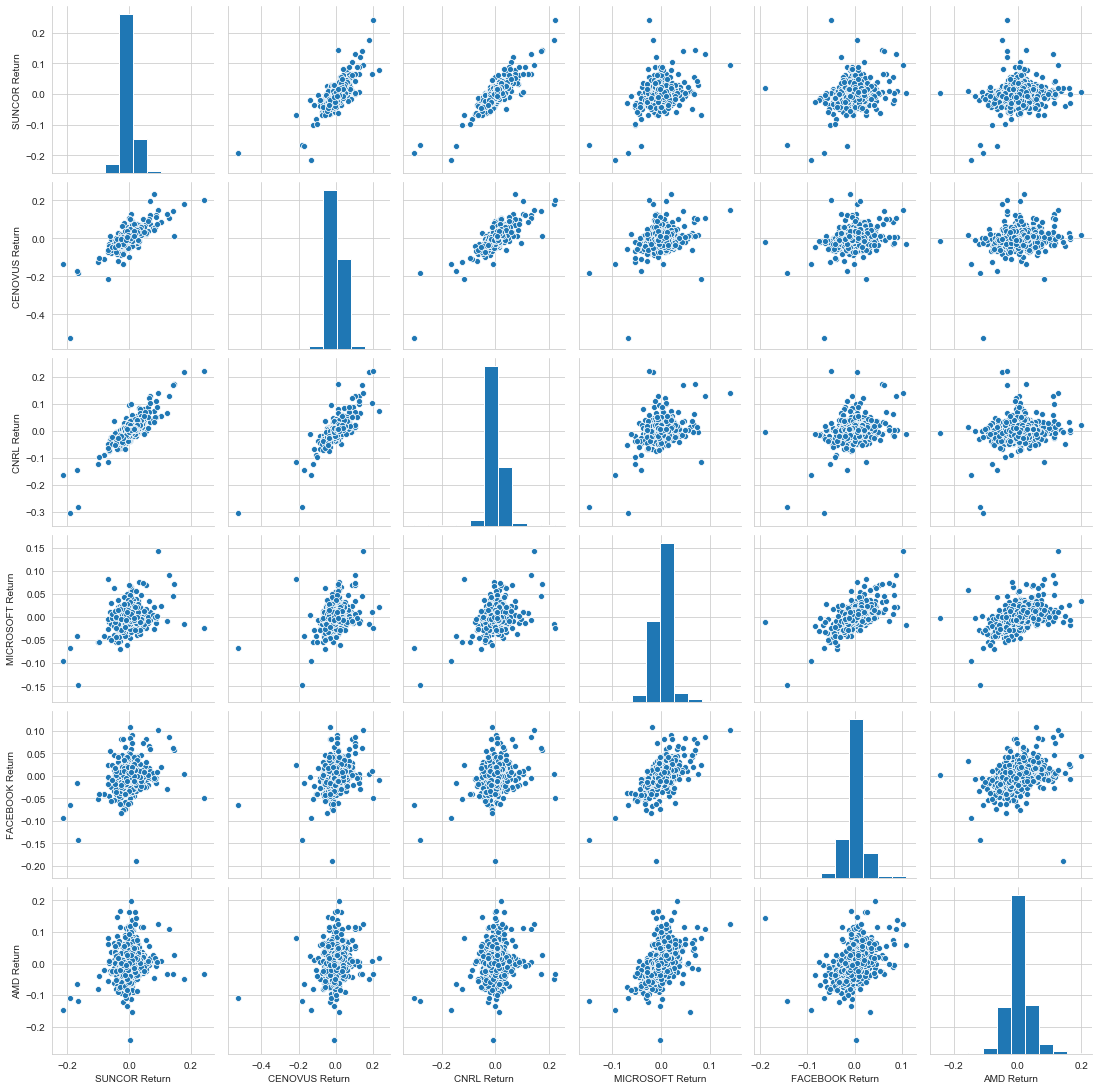

In [46]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:]) # avoiding NaN row

In [47]:
# Best Single day gain
returns.idxmax()

SUNCOR Return      2020-11-09
CENOVUS Return     2020-04-02
CNRL Return        2020-11-09
MICROSOFT Return   2020-03-13
FACEBOOK Return    2019-01-31
AMD Return         2019-01-30
dtype: datetime64[ns]

In [48]:
# Worst single day drop 
returns.idxmin()

SUNCOR Return      2020-03-12
CENOVUS Return     2020-03-09
CNRL Return        2020-03-09
MICROSOFT Return   2020-03-16
FACEBOOK Return    2018-07-26
AMD Return         2017-05-02
dtype: datetime64[ns]

In [49]:
returns.std() 

SUNCOR Return       0.025428
CENOVUS Return      0.037136
CNRL Return         0.029268
MICROSOFT Return    0.017194
FACEBOOK Return     0.020366
AMD Return          0.036584
dtype: float64

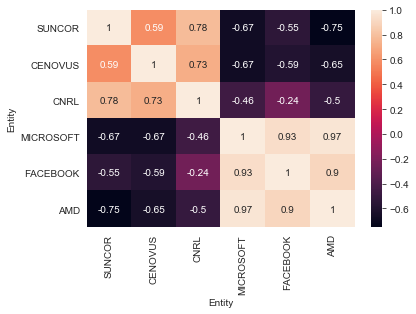

In [51]:
sns.heatmap(to.xs(key='Close',axis=1,level='Stock').corr(),annot=True)

In [52]:
close_corr = to.xs(key='Close',axis=1,level='Stock').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

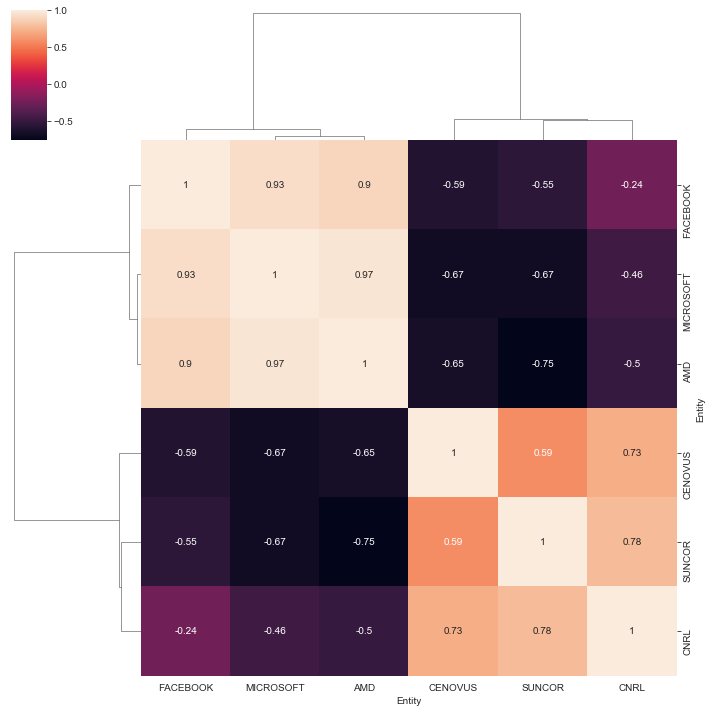

In [53]:
sns.clustermap(to.xs(key='Close',axis=1,level='Stock').corr(),annot=True)